<a href="https://colab.research.google.com/github/anitashar/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Copy_of_anita_sharma_Copy_of_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

dfo = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(dfo.shape)
dfo.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
dff = dfo.drop(['diagnosis', 'Unnamed: 32'], axis=1)
dff.head()

df = dfo.drop(['diagnosis'], axis=1)

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


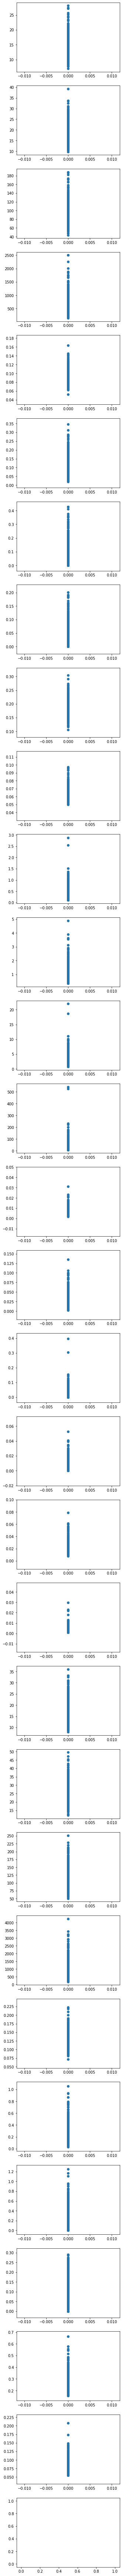

In [13]:
plt.figure(figsize=(5, 16*8))
for x in range(1, 32):
  plt.subplot(31,1, x)
  plt.scatter(([0]*df.shape[0]), df.iloc[:,x])


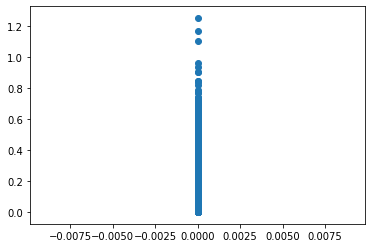

In [14]:
df.columns[14]
df.columns[27]

plt.scatter(([0]*df.shape[0]), df.iloc[:,27])


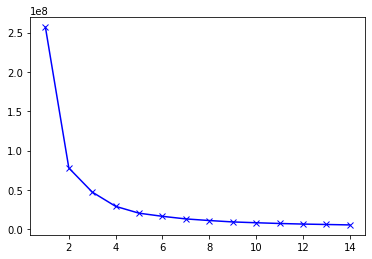

In [15]:
def find_elbow(points):
  sum_of_squared_distances = []
  K = range(1,15)
  for k in K:
      km = KMeans(n_clusters=k)
      km = km.fit(points)
      sum_of_squared_distances.append(km.inertia_)
  plt.plot(K, sum_of_squared_distances, 'bx-')
dfa = df.drop(['id', 'Unnamed: 32'], axis=1)
dfa.dtypes
find_elbow(dfa)

# Seems like the elbow is at k = 4


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

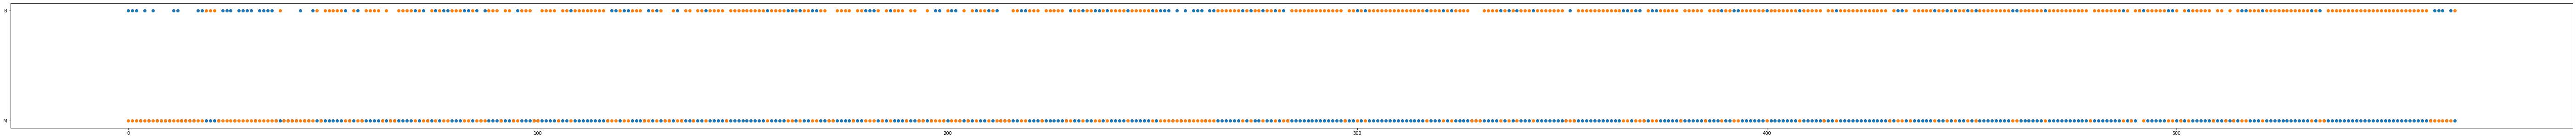

In [16]:
# Your Code Here
k = 2
km = KMeans(n_clusters=k)
km = km.fit(dfa)
our_classification = km.labels_
our_classification
dfo['our_classification'] = our_classification
dfo.head()
plt.figure(figsize=(100, 5))
plt.scatter(range(0, dfo.shape[0]), dfo['our_classification']);
plt.scatter(range(0, dfo.shape[0]), dfo['diagnosis']);

In [0]:
# Assuming M is related to cluster 1
def accuracy(input_df, flag=1):
  label = 1 if flag else 0
  not_label = 0 if flag else 1
  count = 0
  m_dfo = input_df[input_df['diagnosis']=='M']
  m_dfo = m_dfo[m_dfo['our_classification']==label]
  count += m_dfo.shape[0]

  b_dfo = input_df[input_df['diagnosis']=='B']
  b_dfo = b_dfo[b_dfo['our_classification']==not_label]
  count += b_dfo.shape[0]
  return count*100/dfo.shape[0]

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####
# Make a copy of our dataframe, we will standarize the copy so as to not overwrite our original data
dff2 = dff.copy()

In [0]:
# instantiate the SKLearn class for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [0]:
# Standardize the dataset (default is normalization)
dff2_std = scaler.fit_transform(dff2)

In [21]:
dff2_std.mean()

3.4240111423328146e-18

In [22]:
dff2_std.std()

1.0

In [0]:
# import and instantiate the PCA class
from sklearn.decomposition import PCA


In [0]:
# Apply PCA to the data



0.42864701335977745

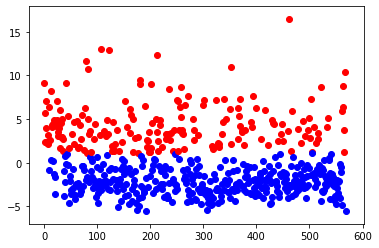

In [24]:
# Your Code Here
def two_means(points):
  k = 2
  km = KMeans(n_clusters=k)
  km = km.fit(points)
  return km.labels_

pca1 = PCA(n_components=1)
pca1_features = pca1.fit_transform(dff2_std)
pca1_classification = two_means(pca1_features)
color_map = { 0: 'red', 1: 'blue' }

for index in range(0,dff2_std.shape[0]):
  plt.scatter(index, pca1_features[index], color=color_map[pca1_classification[index]])
  
sum(pca1.explained_variance_ratio_)


0.6124149284660226

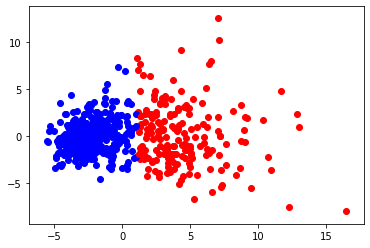

In [25]:
pca2 = PCA(n_components=2)
pca2_features = pca2.fit_transform(dff2_std)
pca2_classification = two_means(pca2_features)
color_map = { 0: 'red', 1: 'blue' }

for index in range(0,dff2_std.shape[0]):
  plt.scatter(pca2_features[index][0], pca2_features[index][1], color=color_map[pca2_classification[index]])
  
sum(pca2.explained_variance_ratio_)

0.7038792848566929

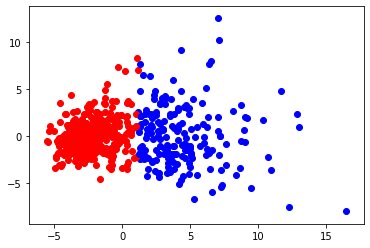

In [26]:
pca3 = PCA(n_components=3)
pca3_features = pca3.fit_transform(dff2_std)
pca3_classification = two_means(pca3_features)
color_map = { 0: 'red', 1: 'blue' }

for index in range(0,dff2_std.shape[0]):
  plt.scatter(pca3_features[index][0], pca3_features[index][1], color=color_map[pca3_classification[index]])
  
sum(pca3.explained_variance_ratio_)

In [27]:
pca8 = PCA(n_components=8)
pca8_features = pca8.fit_transform(dff2_std)
pca8_classification = two_means(pca8_features)
color_map = { 0: 'red', 1: 'blue' }
  
sum(pca8.explained_variance_ratio_)
# Hence we need 8 features in order to retain 90% of the variation of the original dataset


0.9140364266860687

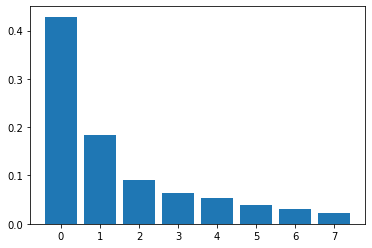

In [28]:
ind = range(8)
vals = pca8.explained_variance_ratio_
plt.bar(ind, vals)
cumvals = np.cumsum(vals)

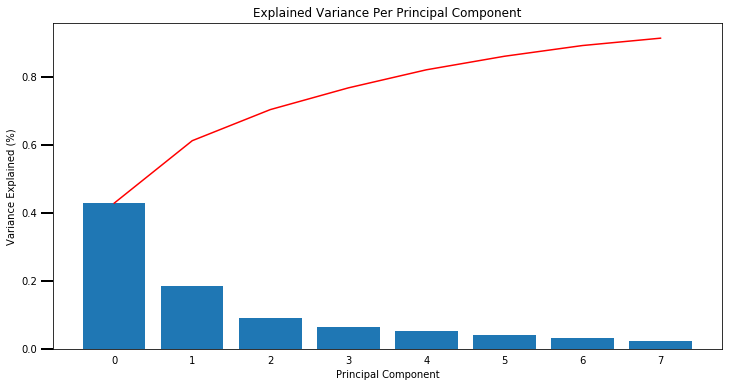

In [29]:
# Define scree plot function
def scree_plot(pca):

    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
   
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
    ax.bar(ind,vals)
    ax.plot(ind, cumvals, c='r')
    
    
    
    
    plt.show()

scree_plot(pca8)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [35]:
# def df_accuracy(input_df): 
#   # this function expects the prediction in our_classification column
#   input_df["transfomed_classification"] = input_df["our_classification"].apply(lambda x: 'M' if x == 0 else 'B')
#   #input_df["is_match"] = input_df['transfomed_classification'].equals(input_df['diagnosis'])
#   #input_df["is_match"]  = input_df[input_df['transfomed_classification']== input_df['diagnosis']]
#   #print(result.shape[0])
#   #print("before")
#   #print(result)
#   #print("after")
#   cond = df["transfomed_classification"] == df["diagnosis"]
#   np.where((), df['diagnosis'], np.nan)
#   print(result)
#   return 1# input_df[input_df["is_match"]== True].shape[0]*100/input_df.shape[0]

dfo_pca1 = dfo.copy()
dfo_pca1["our_classification"] = pca1_classification

accuracy(dfo_pca1, flag=0)

90.86115992970123

In [34]:
dfo_pca2 = dfo.copy()
dfo_pca2["our_classification"] = pca2_classification

accuracy(dfo_pca2, flag=0)

90.68541300527241

In [36]:
dfo_pca8 = dfo.copy()
dfo_pca8["our_classification"] = pca8_classification

accuracy(dfo_pca8, flag=0)

91.21265377855887

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project